In [152]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.tree import export_graphviz


conn = pymysql.connect(
    host='35.199.127.241', 
    port=int(3306), 
    user='looqbox-challenge', 
    passwd='looq-challenge', 
    db='looqbox_challenge')

dp = pd.read_sql_query("SELECT * FROM data_product", conn)
dps = pd.read_sql_query("SELECT * FROM data_product_sales", conn)
dsc = pd.read_sql_query("SELECT * FROM data_store_cad", conn)
dss = pd.read_sql_query("SELECT * FROM data_store_sales", conn)
imdb = pd.read_sql_query("SELECT * FROM IMDB_movies", conn)

### Quickly understanding the tables

In [153]:
dp.head(5)

,PRODUCT_COD,PRODUCT_NAME,PRODUCT_VAL,DEP_NAME,DEP_COD,SECTION_NAME,SECTION_COD
0,10,Acido Tranexamico 250mg Generico EMS 12 Compri...,36.71,MEDICAMENTOS GENÉRICOS,10,CIRCULAÇÃO,40
1,11,Bissulfato de Clopidogrel 75mg Generico Teuto ...,66.51,MEDICAMENTOS GENÉRICOS,10,CIRCULAÇÃO,40
2,12,Cloridrato de Amiodarona 200mg Generico Biosin...,31.17,MEDICAMENTOS GENÉRICOS,10,CIRCULAÇÃO,40
3,13,Acido Tranexâmico 250mg Generico Legrand 12 Co...,36.71,MEDICAMENTOS GENÉRICOS,10,CIRCULAÇÃO,40
4,14,Cloridrato Oximetazolina Adulto 5mg/ml Genéric...,12.08,MEDICAMENTOS GENÉRICOS,10,GRIPES E RESFRIADOS,41


In [154]:
dp.info()
dp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRODUCT_COD   9994 non-null   int64  
 1   PRODUCT_NAME  9994 non-null   object 
 2   PRODUCT_VAL   9994 non-null   float64
 3   DEP_NAME      9994 non-null   object 
 4   DEP_COD       9994 non-null   int64  
 5   SECTION_NAME  9994 non-null   object 
 6   SECTION_COD   9994 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 546.7+ KB


(9994, 7)

In [155]:
# updating to correct formats

dp.PRODUCT_COD = dp.PRODUCT_COD.astype(object)
dp.DEP_COD = dp.DEP_COD.astype(object)
dp.SECTION_COD = dp.SECTION_COD.astype(object)

In [156]:
dps.head(5)

,STORE_CODE,PRODUCT_CODE,DATE,SALES_VALUE,SALES_QTY
0,1,18,2019-01-01,708.5,65.0
1,1,18,2019-01-02,1297.1,119.0
2,1,18,2019-01-03,1144.5,105.0
3,1,18,2019-01-04,1090.0,100.0
4,1,18,2019-01-05,893.8,82.0


In [157]:
dps.info()
dps.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173133 entries, 0 to 2173132
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   STORE_CODE    object 
 1   PRODUCT_CODE  int64  
 2   DATE          object 
 3   SALES_VALUE   float64
 4   SALES_QTY     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 82.9+ MB


(2173133, 5)

In [158]:
# updating to correct formats

dps.PRODUCT_CODE = dps.PRODUCT_CODE.astype(object)
dps.DATE = pd.to_datetime(dps.DATE)

In [159]:
dsc.head(10)

,STORE_CODE,STORE_NAME,START_DATE,END_DATE,BUSINESS_NAME,BUSINESS_CODE
0,1,Sao Paulo,2006-10-01,,Varejo,1
1,2,Chicago,2007-10-01,,Varejo,1
2,3,Roma,2008-10-01,,Varejo,1
3,4,Tokio,2009-10-01,,Varejo,1
4,5,Paris,2019-01-01,,Proximidade,2
5,6,Berlin,2011-10-01,,Proximidade,2
6,7,New York,2012-10-01,,Proximidade,2
7,8,Belem,2013-10-01,,Proximidade,2
8,9,London,2014-10-01,,Farma,4
9,10,Hong Kong,2019-01-01,,Farma,4


In [160]:
dsc.info()
dsc.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STORE_CODE     20 non-null     int64 
 1   STORE_NAME     20 non-null     object
 2   START_DATE     20 non-null     object
 3   END_DATE       20 non-null     object
 4   BUSINESS_NAME  20 non-null     object
 5   BUSINESS_CODE  20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


(20, 6)

In [161]:
# updating to correct formats

dsc.STORE_CODE = dsc.STORE_CODE.astype(object)
dsc.BUSINESS_CODE = dsc.BUSINESS_CODE.astype(object)
dsc.START_DATE = pd.to_datetime(dsc.START_DATE)
dsc.END_DATE = pd.to_datetime(dsc.END_DATE)

In [162]:
dss.head(5)

,STORE_CODE,DATE,SALES_VALUE,SALES_QTY
0,1,2014-11-23,111387.87,7227
1,10,2014-11-23,63256.35,4362
2,11,2014-11-23,62680.86,4257
3,12,2014-11-23,62680.86,4257
4,13,2014-11-23,111387.87,7227


In [163]:
dss.info()
dss.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35762 entries, 0 to 35761
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STORE_CODE   35762 non-null  int64  
 1   DATE         35762 non-null  object 
 2   SALES_VALUE  35762 non-null  float64
 3   SALES_QTY    35762 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ MB


(35762, 4)

In [164]:
# updating to correct formats

dss.STORE_CODE = dss.STORE_CODE.astype(object)
dss.DATE = pd.to_datetime(dss.DATE)

### Checking for duplicates (no null rows found)

In [165]:
sum(dp.duplicated())

0

In [166]:
sum(dps.duplicated())

0

In [167]:
sum(dsc.duplicated())

0

In [168]:
sum(dss.duplicated())

0

### Brief exploratory analysis

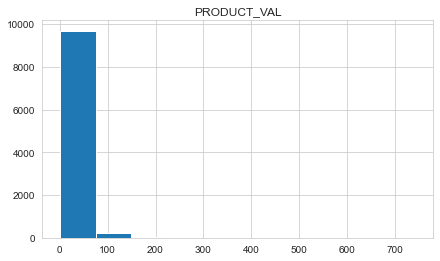

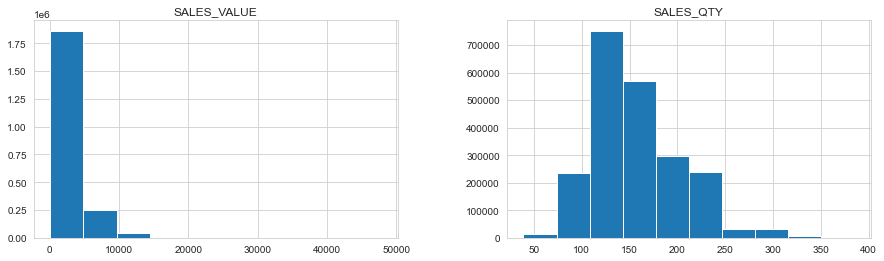

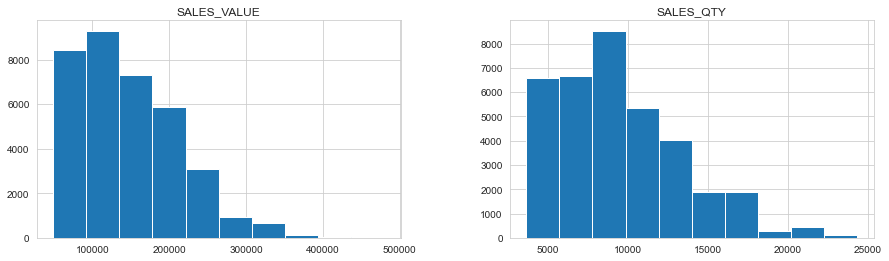

In [169]:
dp.hist(figsize=(7,4));
dps.hist(figsize=(15,4));
dss.hist(figsize=(15,4));

In [170]:
dp.describe(include='all')

,PRODUCT_COD,PRODUCT_NAME,PRODUCT_VAL,DEP_NAME,DEP_COD,SECTION_NAME,SECTION_COD
count,9994.0,9994,9994.000000,9994,9994.0,9994,9994.0
unique,9994.0,9962,NaN,11,11.0,44,45.0
top,163839.0,Achocolatado Liquido TODDYNHO 200ml,NaN,MERCEARIA,6.0,BEBIDAS,4.0
freq,1.0,2,NaN,4358,4358.0,1038,1038.0
mean,NaN,NaN,17.642484,NaN,NaN,NaN,NaN
std,NaN,NaN,27.506942,NaN,NaN,NaN,NaN
min,NaN,NaN,0.580000,NaN,NaN,NaN,NaN
25%,NaN,NaN,5.090000,NaN,NaN,NaN,NaN
50%,NaN,NaN,9.990000,NaN,NaN,NaN,NaN
75%,NaN,NaN,19.495000,NaN,NaN,NaN,NaN


In [171]:
dps.describe(include='all', datetime_is_numeric=True)

,STORE_CODE,PRODUCT_CODE,DATE,SALES_VALUE,SALES_QTY
count,2173133,2173133.0,2173133,2.173133e+06,2.173133e+06
unique,20,110.0,NaN,NaN,NaN
top,1,6479.0,NaN,NaN,NaN
freq,136729,35762.0,NaN,NaN,NaN
mean,NaN,NaN,2017-06-28 16:14:50.969455616,2.428775e+03,1.565161e+02
min,NaN,NaN,2014-11-23 00:00:00,6.279000e+01,3.900000e+01
25%,NaN,NaN,2016-03-14 00:00:00,7.490800e+02,1.200000e+02
50%,NaN,NaN,2017-07-04 00:00:00,1.405800e+03,1.490000e+02
75%,NaN,NaN,2018-10-23 00:00:00,3.122580e+03,1.820000e+02
max,NaN,NaN,2019-12-31 00:00:00,4.783863e+04,3.850000e+02


In [172]:
dsc.describe(include='all', datetime_is_numeric=True)

,STORE_CODE,STORE_NAME,START_DATE,END_DATE,BUSINESS_NAME,BUSINESS_CODE
count,20.0,20,20,0,20,20.0
unique,20.0,20,NaN,NaN,5,5.0
top,20.0,Berlin,NaN,NaN,Varejo,5.0
freq,1.0,1,NaN,NaN,4,4.0
mean,NaN,NaN,2015-09-13 10:48:00,NaT,NaN,NaN
min,NaN,NaN,2006-10-01 00:00:00,NaT,NaN,NaN
25%,NaN,NaN,2012-07-01 12:00:00,NaT,NaN,NaN
50%,NaN,NaN,2019-01-01 00:00:00,NaT,NaN,NaN
75%,NaN,NaN,2019-01-01 00:00:00,NaT,NaN,NaN
max,NaN,NaN,2019-01-01 00:00:00,NaT,NaN,NaN


In [173]:
dss.describe(include='all', datetime_is_numeric=True)

,STORE_CODE,DATE,SALES_VALUE,SALES_QTY
count,35762.0,35762,35762.000000,35762.000000
unique,20.0,NaN,NaN,NaN
top,20.0,NaN,NaN,NaN
freq,1863.0,NaN,NaN,NaN
mean,NaN,2017-06-19 23:01:15.096472064,147588.240967,9510.941027
min,NaN,2014-11-23 00:00:00,48894.300000,3640.000000
25%,NaN,2016-03-08 00:00:00,95611.310000,6680.000000
50%,NaN,2017-06-23 00:00:00,136140.730000,8760.000000
75%,NaN,2018-10-06 00:00:00,187896.710000,11826.000000
max,NaN,2019-12-31 00:00:00,479566.460000,24332.000000


# Questions

### 1. How many products does the company have?

In [174]:
# getting unique values for product code

dp['PRODUCT_COD'].nunique()

9994

### _Answer 1:_ 
#### _There are 9994 unique products_

### 2. What are the 10 most expensive products in the company?

### _Answer 2:_

In [175]:
# sorting product values descending

sort_by_price = dp.drop(columns=['PRODUCT_COD', 'DEP_NAME', 'DEP_COD', 'SECTION_NAME', 'SECTION_COD']).sort_values('PRODUCT_VAL', ascending=False)
print(sort_by_price.head(10))

                                           PRODUCT_NAME  PRODUCT_VAL
7942  Whisky Escoces THE MACALLAN Ruby Garrafa 700ml...       741.99
5374  Whisky Escoces JOHNNIE WALKER Blue Label Garra...       735.90
9032   Cafeteira Expresso 3 CORACOES Tres Modo Vermelho       499.00
3057  Vinho Portugues Tinto Vintage QUINTA DO CRASTO...       445.90
9237  Escova Dental Eletrica ORAL B D34 Professional...       399.90
5677  Champagne Rose VEUVE CLICQUOT PONSARDIM Garraf...       366.90
4640  Champagne Frances Brut Imperial MOET Rose Garr...       359.90
8647  Conjunto de Panelas Allegra em Inox TRAMONTINA...       359.00
4449  Whisky Escoces CHIVAS REGAL 18 Anos Garrafa 750ml       329.90
4669  Champagne Frances Brut Imperial MOET & CHANDON...       315.90


(0.0, 750.0)

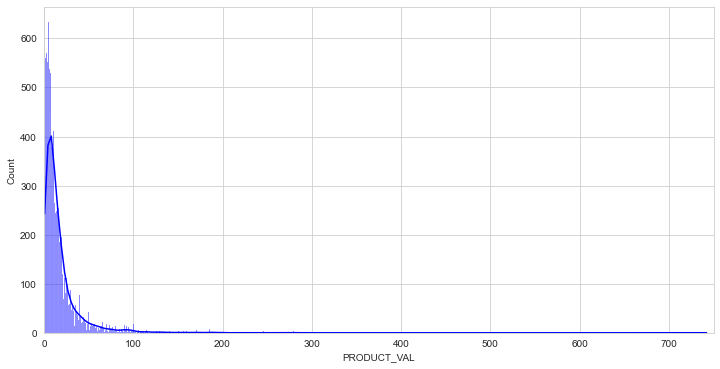

In [176]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.histplot(dp['PRODUCT_VAL'], bins=800, kde=True, color='b')
plt.xlim([0, 750])

### 3. What sections do the 'BEBIDAS' and 'PADARIA' departments have?

### _Answer 3:_

In [177]:
# getting unique values of sections within 'BEBIDAS' department

print(dp['SECTION_NAME'][dp.DEP_NAME == 'BEBIDAS'].unique())

['BEBIDAS' 'VINHOS' 'CERVEJAS' 'REFRESCOS']


In [178]:
# getting unique values of sections within 'PADARIA' department

print(dp['SECTION_NAME'][dp.DEP_NAME == 'PADARIA'].unique())

['DOCES-E-SOBREMESAS' 'QUEIJOS-E-FRIOS' 'PADARIA' 'GESTANTE']


### 4. On which day were the most products sold? In which store?

In [179]:
# getting the sum of 'SALES_QTY' for each day and sorting it by descending order

res = dps.groupby('DATE')[['SALES_QTY']].sum().sort_values('SALES_QTY', ascending=False)
print(res)

            SALES_QTY
DATE                 
2019-09-25   372819.0
2019-02-20   367745.0
2019-07-03   365076.0
2019-07-31   364532.0
2019-12-25   361267.0
...               ...
2015-08-09   105857.0
2015-01-25   105857.0
2014-12-21   104718.0
2015-09-27   103574.0
2015-01-31   103574.0

[1863 rows x 1 columns]


In [180]:
# getting the sum of 'SALES_QTY' for each store in date from above, and sorting it by descending order

res2 = dps[dps['DATE'].dt.date.astype(str) == '2019-09-25']
print(res2.groupby(['DATE','STORE_CODE'])[['SALES_QTY']].sum().sort_values('SALES_QTY', ascending=False))

                       SALES_QTY
DATE       STORE_CODE           
2019-09-25 2             23957.0
           1             23373.0
           4             23373.0
           13            23373.0
           14            23373.0
           15            23373.0
           16            23373.0
           7             23373.0
           6             23373.0
           5             23373.0
           3             23373.0
           8             23162.0
           11            15518.0
           12            14050.0
           9             11346.0
           20            10352.0
           18            10352.0
           17            10352.0
           19            10352.0
           10             9648.0


### _Answer 4:_ 
#### _DATE: 2019-09-25_
#### _STORE_CODE: 2_

### 5. *Bonus!!* What was the total sale of products (in $) of each business area in the first quarter of 2019?

In [181]:
# joining dataframes

df = pd.merge(dsc, dss)
df = df.drop(columns=['START_DATE', 'END_DATE'])

In [182]:
# filtering first quarter

mask = (df['DATE'] > '2019-01-01') & (df['DATE'] <= '2019-03-31')
df = df.loc[mask]

In [183]:
df

,STORE_CODE,STORE_NAME,BUSINESS_NAME,BUSINESS_CODE,DATE,SALES_VALUE,SALES_QTY
1499,1,Sao Paulo,Varejo,1,2019-01-02,307504.48,19973
1500,1,Sao Paulo,Varejo,1,2019-01-03,274842.91,17860
1501,1,Sao Paulo,Varejo,1,2019-01-04,242439.39,15713
1502,1,Sao Paulo,Varejo,1,2019-01-05,205547.18,13338
1503,1,Sao Paulo,Varejo,1,2019-01-06,170200.21,11041
...,...,...,...,...,...,...,...
35482,20,Vancouver,Posto,3,2019-03-27,123572.21,9043
35483,20,Vancouver,Posto,3,2019-03-28,101777.62,7448
35484,20,Vancouver,Posto,3,2019-03-29,95057.10,6956
35485,20,Vancouver,Posto,3,2019-03-30,69895.25,5115


### _Answer 5:_ 

In [184]:
# getting sales value per business name

res3 = df.groupby('BUSINESS_NAME')[['SALES_VALUE']].sum()
print(res3)

               SALES_VALUE
BUSINESS_NAME             
Atacado        79598391.72
Farma          81070136.79
Posto          31803941.60
Proximidade    79386419.92
Varejo         80235387.31


# Building your own visualization

In [185]:
imdb.head(5)

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.0,757074,333.0,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.0,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.0,157606,138.0,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.0,60545,270.0,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.0,393727,325.0,40.0


In [186]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1000 non-null   int64  
 1   Title            1000 non-null   object 
 2   Genre            1000 non-null   object 
 3   Director         1000 non-null   object 
 4   Actors           1000 non-null   object 
 5   Year             1000 non-null   int64  
 6   Runtime          1000 non-null   int64  
 7   Rating           1000 non-null   float64
 8   Votes            1000 non-null   int64  
 9   RevenueMillions  872 non-null    float64
 10  Metascore        936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


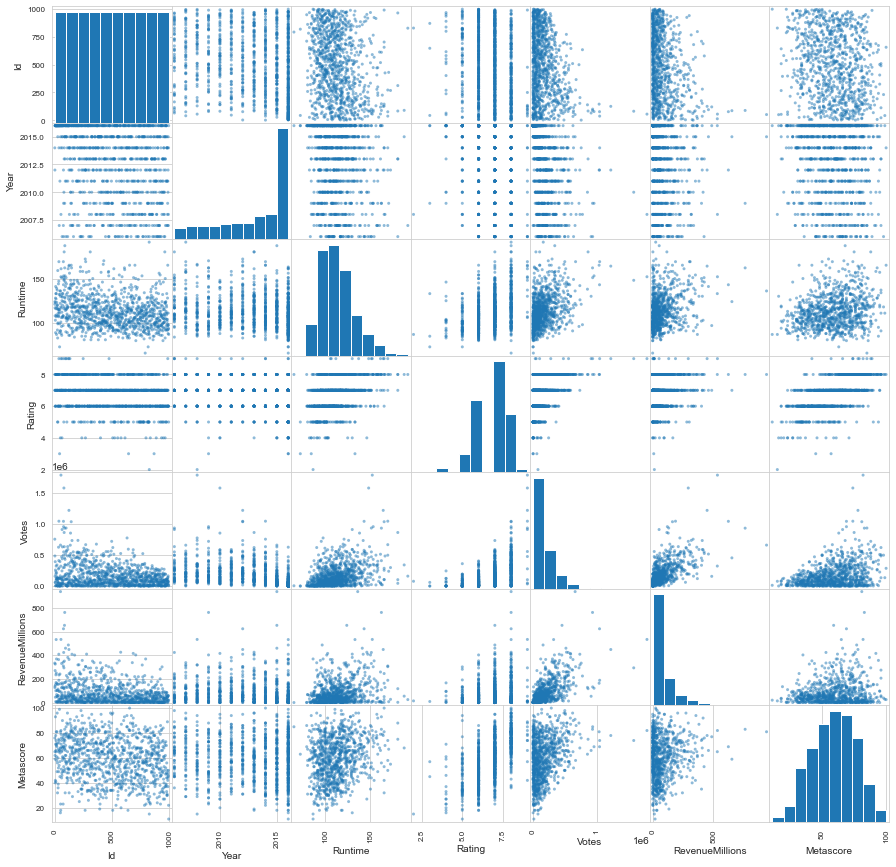

In [187]:
# checking for co-relation

pd.plotting.scatter_matrix(imdb, figsize=(15,15));

<AxesSubplot:>

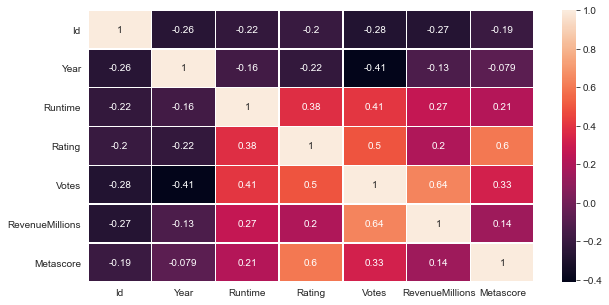

In [188]:
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches

cor = imdb.corr()
sns.heatmap(cor, annot=True, fmt=".2g", linewidths=0.5)

Apparently we have a slightly pattern between Rating and Votes/Runtime. Let's explore this:


In [189]:
# checking Rating only

corr_matrix = imdb.corr()
corr_matrix['Rating']

Id                -0.201410
Year              -0.223532
Runtime            0.378724
Rating             1.000000
Votes              0.495715
RevenueMillions    0.199529
Metascore          0.599772
Name: Rating, dtype: float64

In [190]:
# checking for patterns in Votes

imdb.groupby('Votes')['Runtime'].describe()

,count,mean,std,min,25%,50%,75%,max
Votes,,,,,,,,
61,1.0,96.0,NaN,96.0,96.0,96.0,96.0,96.0
96,1.0,107.0,NaN,107.0,107.0,107.0,107.0,107.0
102,1.0,98.0,NaN,98.0,98.0,98.0,98.0,98.0
115,1.0,88.0,NaN,88.0,88.0,88.0,88.0,88.0
164,1.0,108.0,NaN,108.0,108.0,108.0,108.0,108.0
...,...,...,...,...,...,...,...,...
1045588,1.0,143.0,NaN,143.0,143.0,143.0,143.0,143.0
1047747,1.0,169.0,NaN,169.0,169.0,169.0,169.0,169.0
1222645,1.0,164.0,NaN,164.0,164.0,164.0,164.0,164.0


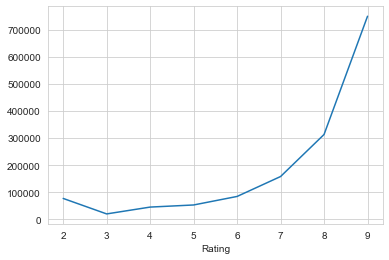

In [191]:
# focusing on the mean average of the Votes per Rating

imdb.groupby('Rating')['Votes'].mean().plot();

In [192]:
# checking for patterns in Runtime

imdb.groupby('Rating')['Runtime'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
2.0,1.0,87.000000,NaN,87.0,87.00,87.0,87.00,87.0
3.0,3.0,97.000000,31.749016,73.0,79.00,85.0,109.00,133.0
4.0,16.0,102.000000,17.663522,83.0,90.25,100.5,103.25,146.0
5.0,67.0,101.507463,13.238343,73.0,92.00,99.0,112.00,133.0
6.0,270.0,106.692593,14.692573,80.0,97.00,106.0,114.00,165.0
7.0,413.0,113.876513,16.315808,81.0,102.00,112.0,123.00,180.0
8.0,218.0,123.032110,22.143518,66.0,106.25,120.0,136.00,191.0
9.0,12.0,141.833333,23.178491,106.0,125.50,149.5,161.75,169.0


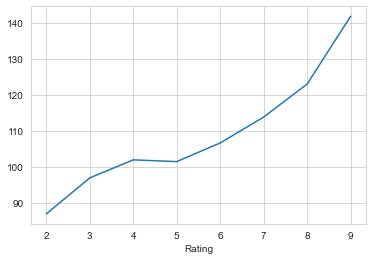

In [193]:
# focusing on the mean average of the Runtime per Rating

imdb.groupby('Rating')['Runtime'].mean().plot();

In [194]:
# although weak R-squared in simple linear regression

import statsmodels.api as sm

model = sm.OLS.from_formula('Rating ~ Runtime + Votes', data=imdb)

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     197.0
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           7.92e-73
Time:                        23:35:46   Log-Likelihood:                -1236.9
No. Observations:                1000   AIC:                             2480.
Df Residuals:                     997   BIC:                             2495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1533      0.167     30.821      0.0

In [195]:
imdb.head(5)


,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.0,757074,333.0,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.0,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.0,157606,138.0,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.0,60545,270.0,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.0,393727,325.0,40.0


In [196]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1000 non-null   int64  
 1   Title            1000 non-null   object 
 2   Genre            1000 non-null   object 
 3   Director         1000 non-null   object 
 4   Actors           1000 non-null   object 
 5   Year             1000 non-null   int64  
 6   Runtime          1000 non-null   int64  
 7   Rating           1000 non-null   float64
 8   Votes            1000 non-null   int64  
 9   RevenueMillions  872 non-null    float64
 10  Metascore        936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [197]:
# organizing dataframe for stats

imdb2 = imdb[['Rating','Runtime', 'Votes', 'RevenueMillions', 'Metascore', 'Director']]
director_code = pd.get_dummies(imdb2['Director'],drop_first=True) # create dummy variable for each Director
imdb2 = pd.concat([imdb2, director_code], axis = 1) 
imdb2 = imdb2.drop('Director', axis=1)
imdb2 = imdb2.dropna(how='any',axis=0)
imdb2 = imdb2.reset_index(drop=True)

In [198]:
imdb2.head()

,Rating,Runtime,Votes,RevenueMillions,Metascore,Abdellatif Kechiche,Adam Leon,Adam McKay,Adam Shankman,Adam Wingard,...,Will Gluck,Will Slocombe,William Brent Bell,William Oldroyd,Woody Allen,Xavier Dolan,Yimou Zhang,Yorgos Lanthimos,Zack Snyder,Zackary Adler
0,8.0,121,757074,333.0,76.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,124,485820,126.0,65.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,117,157606,138.0,62.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,108,60545,270.0,59.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,123,393727,325.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
# to split correctly, lets first see how classes are distributed over the full dataset.
# we keep the same proportion of classes

imdb2['Rating'].value_counts() / len(imdb2['Rating'])

7.0    0.426014
6.0    0.258950
8.0    0.239857
5.0    0.050119
9.0    0.013126
4.0    0.009547
3.0    0.001193
2.0    0.001193
Name: Rating, dtype: float64

In [200]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(imdb2, imdb2['Rating'], test_size = 0.5, random_state=42)

In [201]:
X_train['Rating'].value_counts() / len(X_train['Rating'])

7.0    0.436754
6.0    0.272076
8.0    0.233890
5.0    0.042959
4.0    0.009547
9.0    0.004773
Name: Rating, dtype: float64

In [202]:
# now we need to separate Labels (Rating) From Features, creating a different data set for each

imdb_features = X_train.drop('Rating', axis=1)
imdb_labels = X_train['Rating'].copy()

In [203]:
lin_reg = LinearRegression()
lin_reg.fit(imdb_features, imdb_labels)

LinearRegression()

In [204]:
some_data = imdb_features.iloc[:8]
some_labels = imdb_labels.iloc[:8]

In [205]:
print('Predicted: {} \n Labels: {}'.format(list(lin_reg.predict(some_data)), list(some_labels.values)))


Predicted: [7.611407757107534, 6.337182767120045, 7.8851596464523865, 6.767051865431139, 7.044743657267411, 6.000000000281236, 7.264830151884537, 6.81827849305184] 
 Labels: [8.0, 6.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0]


In [206]:
predictions = lin_reg.predict(imdb_features)
lin_mse = mean_squared_error(imdb_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.2333692936603393

Typical error of 0.23 with Linear Regression. Looks like it's a good algorithm. But let's try with another model.

# Random Forest Classifier

In [208]:
forest_clas = RandomForestClassifier(n_estimators=100)
forest_clas.fit(imdb_features, imdb_labels) # training

predictions = forest_clas.predict(imdb_features)
forest_mse = mean_squared_error(imdb_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [210]:
print('Predicted: {} \n Labels: {}'.format(list(forest_clas.predict(some_data)), list(some_labels.values)))

Predicted: [8.0, 6.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0] 
 Labels: [8.0, 6.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0]


In [211]:
print(classification_report(imdb_labels,predictions))

              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         4
         5.0       1.00      1.00      1.00        18
         6.0       1.00      1.00      1.00       114
         7.0       1.00      1.00      1.00       183
         8.0       1.00      1.00      1.00        98
         9.0       1.00      1.00      1.00         2

    accuracy                           1.00       419
   macro avg       1.00      1.00      1.00       419
weighted avg       1.00      1.00      1.00       419



In [216]:
from sklearn.metrics import f1_score

features = imdb2[['Runtime', 'Votes', 'RevenueMillions', 'Metascore']]

plt_x = np.linspace(0,len(features)-1,len(features))
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: float("{0:.5f}".format(round(x, 4))), forest_clas.feature_importances_), features),
             reverse=True))

Features sorted by their score:
[(0.1709, 'Metascore'), (0.1321, 'Votes'), (0.0935, 'RevenueMillions'), (0.0933, 'Runtime')]
